# Linear Optimization

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import display, Math

## 1. Introduction to Optimization

**Optimization** is the process of finding the best solution to a problem from a set of possible solutions. In mathematical terms, we seek to find the minimum or maximum of a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$.

### Key Concepts:

- **Objective Function**: The function $f(x)$ we want to minimize or maximize
- **Decision Variables**: The variables $x = (x_1, x_2, ..., x_n)$ we can control
- **Optimal Solution**: The point $x^*$ where $f(x^*)$ is minimal (or maximal)

### Types of Optimization:

1. **Unconstrained Optimization**: Find $\min_{x \in \mathbb{R}^n} f(x)$
2. **Constrained Optimization**: Find $\min_{x \in \mathbb{R}^n} f(x)$ subject to constraints $g_i(x) \leq 0$, $h_j(x) = 0$



## 1. Mathematical Foundations

### Gradient

The **gradient** of a function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ at a point $x$ is the vector of partial derivatives:

$$\nabla f(x) = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n}\right]^T$$

**Intuition**: The gradient points in the direction of steepest increase of the function. Its negative points in the direction of steepest decrease.

### Hessian Matrix

The **Hessian matrix** is the matrix of second-order partial derivatives:

$$H(x) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

**Intuition**: The Hessian describes the curvature of the function, helping us determine whether a point is a minimum, maximum, or saddle point.

## 2. Stationary Point Analysis

A **stationary point** (or critical point) is a point where the gradient equals zero:

$$\nabla f(x^*) = 0$$

### Classification of Stationary Points

Using the Hessian matrix $H(x^*)$ at a stationary point:

1. **Local Minimum**: $H(x^*)$ is positive definite (all eigenvalues > 0)
2. **Local Maximum**: $H(x^*)$ is negative definite (all eigenvalues < 0)
3. **Saddle Point**: $H(x^*)$ has both positive and negative eigenvalues
4. **Inconclusive**: $H(x^*)$ is singular or has zero eigenvalues

### Implementation

In [2]:
# Define symbols for symbolic computation
x, y = sp.symbols('x y')

# Example function: f(x,y) = x^2 + y^2
f_symbolic = x**2 + y**2
print("Function: f(x,y) =", f_symbolic)

# Compute gradient symbolically
gradient = [sp.diff(f_symbolic, x), sp.diff(f_symbolic, y)]
print("\nGradient: ∇f =", gradient)

# Solve for stationary points
stationary_points = sp.solve(gradient, (x, y), dict=True)
print("\nStationary Points:", stationary_points)

# Compute and display Hessian matrix
Hessian = [[sp.diff(f_symbolic, x, x), sp.diff(f_symbolic, x, y)],
           [sp.diff(f_symbolic, y, x), sp.diff(f_symbolic, y, y)]]
print("\nHessian Matrix:")
display(Math(sp.latex(sp.Matrix(Hessian))))

# Classify each stationary point
for point in stationary_points:
    # Evaluate Hessian at the point
    H_eval = [[expr.subs(point) for expr in row] for row in Hessian]
    H_matrix = sp.Matrix(H_eval)
    
    # Calculate eigenvalues
    eigenvalues = list(H_matrix.eigenvals().keys())
    eigenvalues_float = [float(sp.N(ev, chop=True)) for ev in eigenvalues]
    
    # Classify based on eigenvalues
    if all(ev > 0 for ev in eigenvalues_float):
        classification = "Local Minimum (convex)"
    elif all(ev < 0 for ev in eigenvalues_float):
        classification = "Local Maximum (concave)"
    elif any(ev > 0 for ev in eigenvalues_float) and any(ev < 0 for ev in eigenvalues_float):
        classification = "Saddle Point"
    else:
        classification = "Inconclusive"
    
    print(f"\nPoint {point}:")
    print(f"Classification: {classification}")
    print(f"Eigenvalues: {eigenvalues_float}")

Function: f(x,y) = x**2 + y**2

Gradient: ∇f = [2*x, 2*y]

Stationary Points: [{x: 0, y: 0}]

Hessian Matrix:


<IPython.core.display.Math object>


Point {x: 0, y: 0}:
Classification: Local Minimum (convex)
Eigenvalues: [2.0]


## 3. Gradient Descent Algorithm

**Gradient Descent** is an iterative optimization algorithm for finding a local minimum of a differentiable function.

### Formal Definition

Let $f: \mathbb{R}^n \rightarrow \mathbb{R}$ be a continuously differentiable function. The gradient descent algorithm generates a sequence $\{x_k\}_{k=0}^{\infty}$ according to the iteration:

$$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$$

where:
- $x_0 \in \mathbb{R}^n$ is the initial point
- $\alpha_k > 0$ is the **step size** (or **learning rate**) at iteration $k$
- $\nabla f(x_k) \in \mathbb{R}^n$ is the gradient of $f$ evaluated at $x_k$

### Motivation

The gradient descent algorithm is based on the first-order Taylor approximation:

$$f(x + \Delta x) \approx f(x) + \nabla f(x)^T \Delta x$$

To minimize $f$, we want to choose $\Delta x$ such that $f(x + \Delta x) < f(x)$. The direction of steepest descent is:

$$\Delta x = -\alpha \nabla f(x)$$

for some $\alpha > 0$. This gives us the maximum decrease in $f$ for small steps.

### Finite Difference Approximation

In practice, we often cannot compute $\nabla f$ analytically. We use the **finite difference method** to approximate partial derivatives:

#### Forward Difference:
$$\frac{\partial f}{\partial x_i} \approx \frac{f(x + h e_i) - f(x)}{h}$$

#### Central Difference (more accurate):
$$\frac{\partial f}{\partial x_i} \approx \frac{f(x + h e_i) - f(x - h e_i)}{2h}$$

where:
- $h > 0$ is a small step size (typically $h \in [10^{-8}, 10^{-4}]$)
- $e_i$ is the $i$-th standard basis vector


### Learning Rate Properties

The choice of learning rate $\alpha_k$ is crucial:

1. **Constant Learning Rate**: $\alpha_k = \alpha$ for all $k$
   - Simple but may not converge or converge slowly
   
2. **Diminishing Learning Rate**: $\alpha_k \rightarrow 0$ as $k \rightarrow \infty$
   - Ensures convergence under certain conditions
   - Example: $\alpha_k = \frac{\alpha_0}{1 + \beta k}$

3. **Adaptive Learning Rate**: Based on local properties of $f$
   - Line search methods
   - Trust region methods

### Stopping Criteria

Common criteria for terminating the algorithm:

1. **Gradient norm**: $\|\nabla f(x_k)\| < \varepsilon$
2. **Relative change in function value**: $\frac{|f(x_{k+1}) - f(x_k)|}{|f(x_k)|} < \varepsilon$
3. **Relative change in parameters**: $\frac{\|x_{k+1} - x_k\|}{\|x_k\|} < \varepsilon$
4. **Maximum iterations**: $k \geq k_{\max}$

### Challenges and Limitations

1. **Local Minima**: Gradient descent only guarantees convergence to local minima
2. **Saddle Points**: Can get stuck or slow down significantly
3. **Ill-Conditioning**: Poor performance when Hessian has large condition number
4. **Step Size Selection**: Too large → divergence; Too small → slow convergence

In [3]:
def numerical_gradient(f, point, h=1e-4):
    """
    Compute numerical gradient using finite differences.
    
    Parameters:
    - f: function to differentiate
    - point: point at which to evaluate gradient
    - h: small step for finite difference
    
    Returns:
    - gradient vector
    """
    grad = np.zeros_like(point)
    for i in range(len(point)):
        point_minus = np.copy(point)
        point_plus = np.copy(point)
        point_minus[i] -= h
        point_plus[i] += h
        grad[i] = (f(point_plus) - f(point_minus)) / (2 * h)
    return grad

def gradient_descent(f, start_point, learning_rate=0.1, num_steps=100, tolerance=1e-6):
    """
    Perform gradient descent optimization.
    
    Parameters:
    - f: objective function
    - start_point: initial point
    - learning_rate: step size
    - num_steps: maximum number of iterations
    - tolerance: convergence tolerance
    
    Returns:
    - final_point: optimized point
    - history: trajectory of points
    """
    point = start_point.copy()
    history = [point.copy()]
    
    for step in range(num_steps):
        grad = numerical_gradient(f, point)
        
        # Check convergence
        if np.linalg.norm(grad) < tolerance:
            print(f"Converged after {step} iterations")
            break
            
        # Update point
        point -= learning_rate * grad
        history.append(point.copy())
    
    return point, history

In [4]:
# Example: Minimize f(x,y) = x^2 + y^2
f_numpy = lambda p: p[0]**2 + p[1]**2
start_point = np.array([10.0, 10.0])

print("Starting point:", start_point)
print("Initial function value:", f_numpy(start_point))
print("Initial gradient:", numerical_gradient(f_numpy, start_point))

# Run gradient descent
final_point, history = gradient_descent(f_numpy, start_point, learning_rate=0.1, num_steps=50)

print("\nFinal point:", np.round(final_point, 6))
print("Final function value:", f_numpy(final_point))
print("Final gradient:", numerical_gradient(f_numpy, final_point))

Starting point: [10. 10.]
Initial function value: 200.0
Initial gradient: [20. 20.]

Final point: [0.000143 0.000143]
Final function value: 4.0740719526791846e-08
Final gradient: [0.00028545 0.00028545]


In [5]:
def plot_gradient_descent_visualization(f_numpy, f_symbolic, x_range=(-5, 5), y_range=(-5, 5), 
                                start_points=None, num_points=100):
    """
    Visualize gradient descent paths and stationary points on a 2D function.
    """
    # Create meshgrid
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    y_vals = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    # Evaluate function
    f_vec = np.vectorize(lambda x, y: f_numpy(np.array([x, y])))
    Z = f_vec(X, Y)
    
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 5))
    
    # 3D Surface plot
    ax1 = fig.add_subplot(131, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title('3D Surface with Gradient Descent Paths')
    
    # Find and plot stationary points
    x_sym, y_sym = sp.symbols('x y')
    gradient_sym = [sp.diff(f_symbolic, x_sym), sp.diff(f_symbolic, y_sym)]
    stationary_pts = sp.solve(gradient_sym, (x_sym, y_sym), dict=True)
    
    for pt in stationary_pts:
        if all(val.is_real for val in pt.values()):
            x_val = float(pt[x_sym])
            y_val = float(pt[y_sym])
            z_val = f_numpy(np.array([x_val, y_val]))
            ax1.scatter([x_val], [y_val], [z_val], color='red', s=100, marker='*')
    
    # Gradient descent trajectories
    if start_points is not None:
        for start in start_points:
            _, history = gradient_descent(f_numpy, start, learning_rate=0.1, num_steps=50)
            history = np.array(history)
            xs = history[:, 0]
            ys = history[:, 1]
            zs = np.array([f_numpy(np.array([x, y])) for x, y in zip(xs, ys)])
            ax1.plot(xs, ys, zs, 'r-', linewidth=2, alpha=0.8)
            ax1.scatter(xs[0], ys[0], zs[0], color='green', s=50, marker='o')
    
    # Contour plot
    ax2 = fig.add_subplot(132)
    contours = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
    ax2.clabel(contours, inline=True, fontsize=8)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot with Gradient Descent Paths')
    
    # Plot stationary points
    for pt in stationary_pts:
        if all(val.is_real for val in pt.values()):
            x_val = float(pt[x_sym])
            y_val = float(pt[y_sym])
            ax2.plot(x_val, y_val, 'r*', markersize=15, label='Stationary Point')
    
    # Plot gradient descent paths
    if start_points is not None:
        for i, start in enumerate(start_points):
            _, history = gradient_descent(f_numpy, start, learning_rate=0.1, num_steps=50)
            history = np.array(history)
            ax2.plot(history[:, 0], history[:, 1], 'r-', alpha=0.8)
            ax2.plot(history[0, 0], history[0, 1], 'go', markersize=8)
            ax2.plot(history[-1, 0], history[-1, 1], 'ro', markersize=8)
    
    
    # Gradient vector field
    ax3 = fig.add_subplot(133)
    
    # Sample gradient at fewer points for clarity
    x_grad = np.linspace(x_range[0], x_range[1], 20)
    y_grad = np.linspace(y_range[0], y_range[1], 20)
    X_grad, Y_grad = np.meshgrid(x_grad, y_grad)
    
    # Compute gradients
    U = np.zeros_like(X_grad)
    V = np.zeros_like(Y_grad)
    for i in range(len(x_grad)):
        for j in range(len(y_grad)):
            grad = numerical_gradient(f_numpy, np.array([X_grad[j,i], Y_grad[j,i]]))
            U[j,i] = -grad[0]  # Negative for descent direction
            V[j,i] = -grad[1]
    
    # Normalize for better visualization
    N = np.sqrt(U**2 + V**2)
    U_norm = U / (N + 1e-10)
    V_norm = V / (N + 1e-10)
    
    ax3.quiver(X_grad, Y_grad, U_norm, V_norm, N, cmap='coolwarm', alpha=0.8)
    ax3.contour(X, Y, Z, levels=10, colors='gray', alpha=0.3)
    ax3.set_xlabel('x')
    ax3.set_ylabel('y')
    ax3.set_title('Gradient Descent Direction Field')
    
    plt.tight_layout()
    plt.show()

Example 1: Quadratic Function f(x,y) = x² + y²


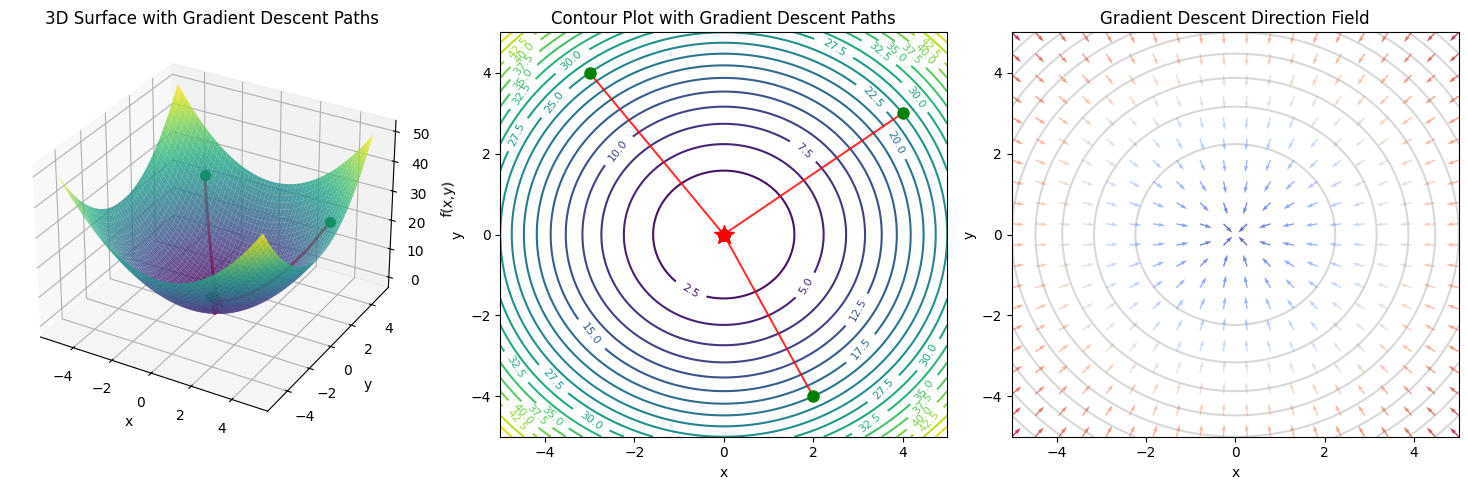

In [6]:
# Example 1: Simple quadratic function
print("Example 1: Quadratic Function f(x,y) = x² + y²")
f1_numpy = lambda p: p[0]**2 + p[1]**2
f1_symbolic = x**2 + y**2
start_points_1 = [np.array([4.0, 3.0]), np.array([-3.0, 4.0]), np.array([2.0, -4.0])]

plot_gradient_descent_visualization(f1_numpy, f1_symbolic, x_range=(-5, 5), y_range=(-5, 5), 
                           start_points=start_points_1)